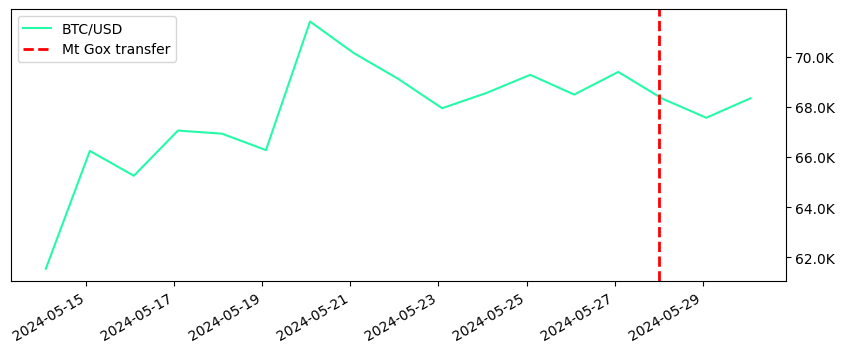

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
import matplotlib.ticker as mticker

# Read the CSV file and convert timestamps to datetime
df = pd.read_csv('BITSTAMP_BTCUSD, 1D.csv')
df['time'] = df['time'].apply(lambda x: datetime.fromtimestamp(x))
df = df[(df['time'] >= datetime.fromisoformat('2024-05-14')) & (df['time'] <= datetime.fromisoformat('2024-05-31'))]

x = df['time']
y1 = df['close']

# Create the plot
fig, ax = plt.subplots(figsize=(10, 4))

ax.xaxis_date()
fig.autofmt_xdate()

ax.plot(x, y1, label='BTC/USD', color=(36/255, 251/255, 169/255))

# Add a red line on May 28th
may_28 = datetime(2024, 5, 28)
ax.axvline(may_28, color='red', linestyle='--', linewidth=2, label='Mt Gox transfer')

# Format the y-axis to be more readable
def human_format(num):
    magnitude = 0
    while abs(num) >= 100:
        magnitude += 1
        num /= 1000.0
    return '%.1f%s' % (num, ['', 'K', 'M', 'bn', 'T', 'TT'][magnitude])

ticks_loc = ax.get_yticks().tolist()
ax.yaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
ax.set_yticklabels([human_format(x) for x in ticks_loc])
ax.yaxis.tick_right()

# Add legend
ax.legend()

# Show the plot
plt.show()
